In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [2]:
!pip install graphviz

In [3]:
import graphviz

In [5]:
data = pd.read_csv('/content/Breast Cancer Dataset.csv')
pd.set_option('display.max_columns', None)
data.diagnosis.unique()
df = data.drop(['id'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [6]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [7]:
import math
def entropy(column):
  counts = column.value_counts()
  probabilities = counts / len(column)
  return-sum(probabilities * probabilities.apply(math.log2))

def conditional_entropy(data, X, target):
  feature_values = data[X].unique() # Corrected: use .unique() on the series
  weighted_entropy = 0
  for value in feature_values:
    subset = data[data[feature] == value]
    weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return weighted_entropy

def information_gain(data, X, target):
  total_entropy = entropy(data[target])
  feature_conditional_entropy = conditional_entropy(data, X, target)
  return total_entropy- feature_conditional_entropy
  for feature in X:
    ig = information_gain(df,feature,'diagnosis')
    print(f"Information Gain for {feature}: {ig}")

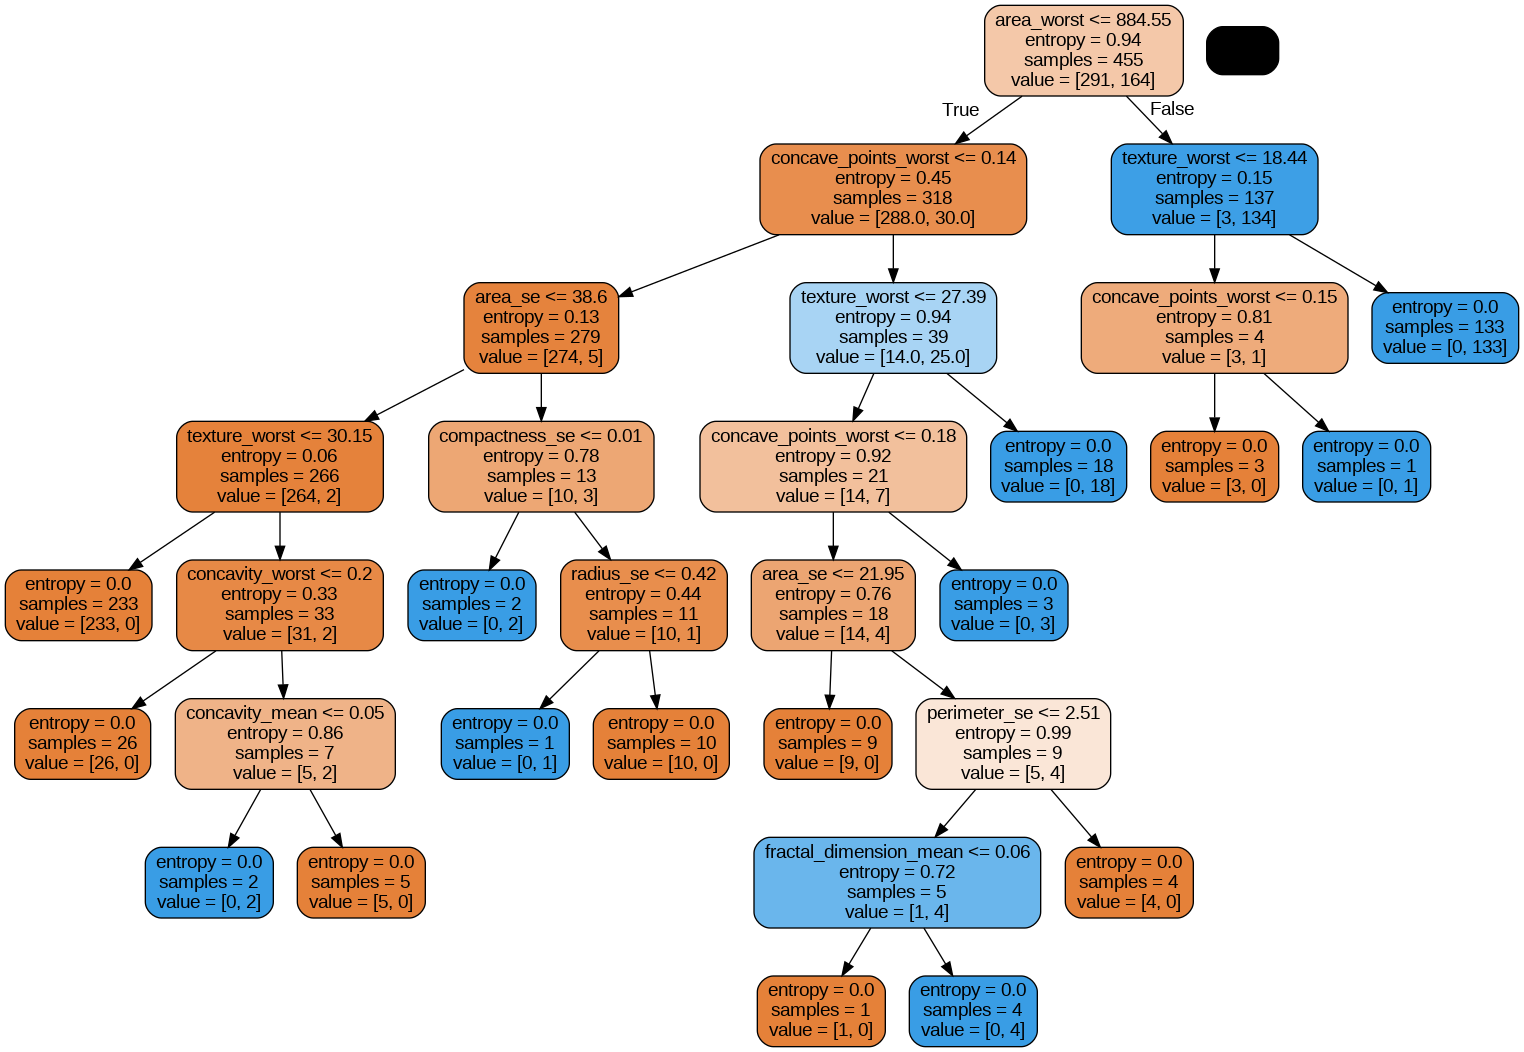

In [8]:
dot_data = export_graphviz(model, out_file=None,feature_names=X_train.columns,rounded=True, proportion=False,precision=2, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

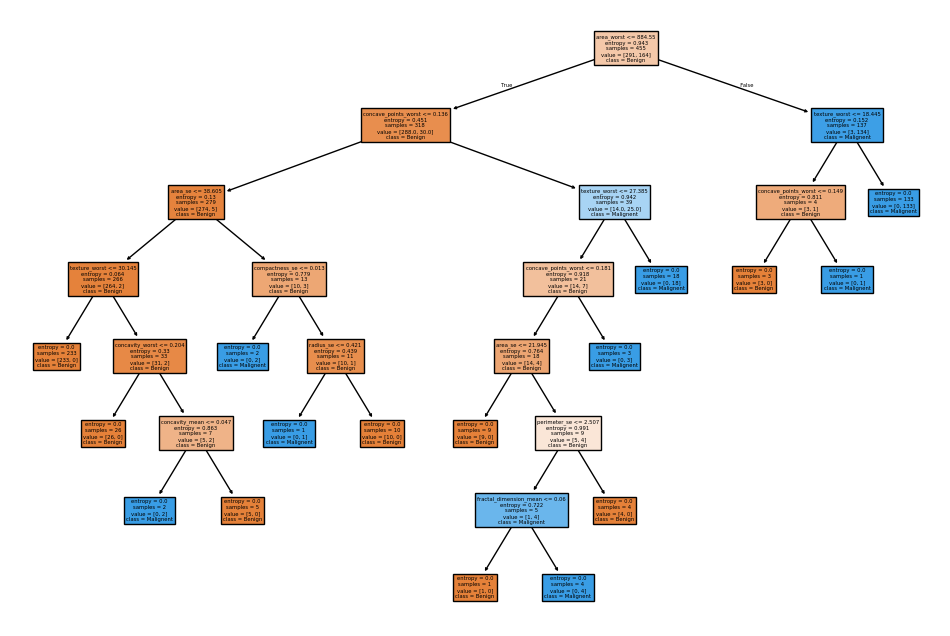

In [9]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Benign','Malignent'])
plt.show()

In [10]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0])

In [11]:
accuracy = accuracy_score(y_test, y_pred) * 100
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 93.85964912280701
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       0.92      0.94      0.93        48

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [12]:
new= [[12.5, 19.2,80.0,500.0, 0.085, 0.1,0.05, 0.02,0.17,0.06,0.4, 1.0,2.5,40.0, 0.006, 0.02,0.03,0.01, 0.02,0.003,16.0, 25.0,105.0,900.0, 0.13, 0.25,0.28, 0.12,0.29,0.08]]
y_pred =model.predict(new)
if y_pred[0] ==0:
  print("Prediction:Benign")
else:
  print("Prediction:Malignant")

Prediction:Malignant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
